## 6. テキストの特徴分析
### 6.1 特徴分析時のデータ形式
テキストが1つの場合は、そのテキストにおける要素を集計し、それらの出現頻度の高い順に分析を行うが、  
テキストが複数ある場合は、テキストごとに要素を集計し、それらを比較分析するのが一般的にである。  
一般的な語ほど、どんな文書にも使われるため、テキストの特徴抽出には役立たない場合もある。  
そうした場合には、より多くの文書に出現する語の重みを低くしなくてはならない。  
そのための尺度として単語の出現頻度と逆文書頻度とを組み合わせた、**TF-IDF**がある。  
TF(Term Frequency)は、文書$d$における語$t$の頻度($tf$)であり、  
IDF(Inverted Document Frequency)は逆文書頻度であり、語$t$が検索対象の中のどれくらいの文書に現れているかに関する指標である。  
$$
IDF=\log{\biggl(\frac{N}{df}\biggr)}
$$

式の中の$df$は、語$t$を含む文書の数、$N$は文書の総数である。  
$IDF$は、語が多くの文書中に現れる場合には小さくなり、特定の文書にしか現れない場合には大きくなる。  
もっともシンプルなTF-IDFは、次の式で定義されている。  
この値が大きいほど、その語の重要度が増すことになる。  
$$
TF-IDF=tf×\log{\biggl(\frac{N}{df}\biggr)}
$$

  
例えば、以下の4つ語が5つのテキストに現れている語の度数が表のようになっているとする。  

In [3]:
import pandas as pd

df = pd.DataFrame({'国民':[1,3,0,0,0],
                   '生活':[0,2,1,3,2],
                   '安心':[2,1,0,2,3],
                   '安全':[1,0,2,1,0]},
                  index=['d1','d2','d3','d4','d5'])
df

,国民,生活,安心,安全
d1,1,0,2,1
d2,3,2,1,0
d3,0,1,0,2
d4,0,3,2,1
d5,0,2,3,0


次のように、対数の中の値が0になることを防ぐ工夫をして用いる場合がある。
$$
w_{ij}=\log{tf_{ij}+1}\log{\biggl(\frac{N}{df_j}+1\biggr)}
$$

In [19]:
import numpy as np
from IPython.core.display import display

N = len(df)
f = N/(df>0).sum()
w1 = df*np.log(f)
w2 = np.log(df+1)*np.log(f+1)
display(w1)
display(w2)

,国民,生活,安心,安全
d1,0.916291,0.000000,0.446287,0.510826
d2,2.748872,0.446287,0.223144,0.000000
d3,0.000000,0.223144,0.000000,1.021651
d4,0.000000,0.669431,0.446287,0.510826
d5,0.000000,0.446287,0.669431,0.000000


,国民,生活,安心,安全
d1,0.868349,0.000000,0.890898,0.679859
d2,1.736698,0.890898,0.562094,0.000000
d3,0.000000,0.562094,0.000000,1.077551
d4,0.000000,1.124188,0.890898,0.679859
d5,0.000000,0.890898,1.124188,0.000000


### 6.2 特異値分解
上のような行列は、一定の条件を満たせば分解することができる。  
このような分解を**特異値分解(SVD)**と呼ぶ。  
$X$は、$n$個のテキストと$m$個の変数からなるデータ行列であり、一定の条件のもとで、次のような3つの行列に分解することができる。  
$$
X_{n×m}=U_{n×r}\Sigma_{r×r}V^T_{r×m}
$$

右辺の$U$は$n$行$r$列の行列、$\Sigma$は$r$行$r$列の正方行列であり、左上から右下にかけて対角線上の成分以外がすべてゼロとなる対角行列である。  
$\Sigma$の対角要素を**特異値**といい、非負で、大きい順に並ぶ。  
$V^T$は行列$V$の転置行列($r$行$m$列)である。    
  
具体的な例を示す。
$$
\begin{bmatrix}
0&1\\
1&0\\
0&1
\end{bmatrix}=
\begin{bmatrix}
0.707&0\\
0&-1\\
0.707&0
\end{bmatrix}
\begin{bmatrix}
1.414&0\\
0&1
\end{bmatrix}
\begin{bmatrix}
0&1\\
-1&0
\end{bmatrix}
$$

行列が$X$が対称行列である場合、特異値分解を**固有値分解**とよび、特異値を**固有値**と呼ぶ。

### 6.3 主成分分析
**主成分分析(PCA)**は、分散共分散行列、または相関係数行列の形式で示されたデータについて、その情報損失を抑えながら、  
多数の変数を少ない変数に集約して分析する方法である。  
分散の情報を用いる場合は、分散が最大となる軸を第1主成分、これと直交し、かつ次に分散が大きい軸を第2主成分とする。  
この方法は、データの分散共分散行列の固有値と固有ベクトルを求める問題に帰結する。  
相関係数を用いる場合は、相関が最大となる軸を第1主成分、これと直交し、かつ次に相関が大きい軸を第2主成分とする。   
この方法は、データの相関係数行列の固有値と固有ベクトルを求める問題に帰結する。    
相関係数行列アh、用いたデータを次の式で標準化したデータの分散共分散行列と等しい。  
次の式で標準化したデータ$z_i$は平均0、分散1の分布に従う。
$$
z_i=\frac{x_i-\bar{x}}{s_x}
$$

#### 主成分と寄与率・累積寄与率
$m×m$の正方行列は、ゼロではない固有値$\lambda_1,\lambda_2,\cdots,\lambda_r(\lambda_i\geq\lambda_{i+1})$が存在し、かつ$r\leq m$であるとする。  
任意の固有値$\lambda_k$が、固有値の合計($\sum_{i=1}^r\lambda_i$)の中に占める割合($\lambda_k/\sum_{i=1}^r\lambda_i$)を寄与率と呼ぶ。  
主成分分析では、固有ベクトルを**主成分(PC)**と呼ぶ。  
第1固有ベクトルを第1主成分、第$i$固有ベクトルを第$i$主成分と呼ぶ。  
**平行分析**とは、分析に用いたデータと同じサイズの乱数行列を発生させ、それの固有値と、用いたデータの固有値とを比較し、  
乱数データより明らかに大きい固有値までを用いる方法である。  
固有ベクトルに、固有値の平方根を乗じて得られたベクトルを**主成分負荷量**と呼ぶ。  
#### 主成分得点
主成分得点は、元のデータ行列と固有ベクトル、あるいは主成分負荷量との線形結合である。  
第$i$行のデータ:　　　　　　$\boldsymbol{x}_i=(x_{i1},x_{i2},\cdots,x_{im})$  
第$j$固有ベクトル:　　　　　$\boldsymbol{a}^T_j=(a_{1j},a_{2j},\cdots,a_{mj})$  
第$i$行の第$j$主成分得点:　　　$z_{ij}=\boldsymbol{x}_i\boldsymbol{a}_j=(x_{i1}a_{1j},x_{i2}a_{2j},\cdots,x_{im}a_{mj})$

#### 主成分分析の例
11人の大学生が3つのテーマについて書いた作文を用いる。  
一般名詞のみを抽出して分析に用いることにする。  
度数データを用いることも考えられるが、文章の長さが同じでない場合には、データを相対頻度に変換して用いる場合もある。

In [20]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/sakubun3f.csv', encoding='shift-jis')
d1

,Unnamed: 0,人,友達,車,自分,事故,人間,食,文化,寿司,...,クラス,外国,男性,交通,家,親友,味,母,相手,OTHERS
0,akke2,8,20,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
1,akke5,0,0,3,2,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,34
2,akke9,2,0,0,1,0,0,3,0,0,...,0,6,0,0,1,0,0,0,0,33
3,ataka2,11,13,0,2,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,41
4,ataka5,4,0,6,2,10,1,0,0,0,...,0,0,0,3,0,0,0,0,0,49
5,ataka9,2,0,0,4,0,0,4,1,0,...,0,0,0,0,0,0,1,0,0,59
6,kana2,8,6,0,3,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,12
7,kana5,1,4,11,3,4,0,0,0,0,...,0,0,0,1,1,0,0,0,0,34
8,kana9,0,1,0,1,0,0,0,0,22,...,0,0,0,0,2,0,1,0,0,60
9,kato2,14,20,0,3,0,0,0,0,0,...,0,0,0,0,0,9,0,0,4,36


In [27]:
cor1 = d1.iloc[:,:-1].corr(method='pearson')
cor1

,人,友達,車,自分,事故,人間,食,文化,寿司,日本人,...,実家,クラス,外国,男性,交通,家,親友,味,母,相手
人,1.000000,0.668792,-0.206772,0.316273,-0.040689,-0.185223,-0.340958,-0.298266,-0.176753,-0.359361,...,-0.283353,0.242102,-0.152314,-0.000496,-0.201610,-0.271399,0.535217,-0.272867,-0.166960,0.286423
友達,0.668792,1.000000,-0.293388,0.395483,-0.233354,-0.142334,-0.324051,-0.237202,-0.084085,-0.320229,...,-0.249490,0.216818,-0.184079,-0.039741,-0.256426,-0.171735,0.514023,-0.273699,-0.101590,0.344738
車,-0.206772,-0.293388,1.000000,0.116342,0.524465,0.568270,-0.319275,-0.233706,-0.110461,-0.315509,...,-0.003151,-0.163799,-0.181365,-0.063144,0.545340,-0.194764,-0.123300,-0.277225,-0.108916,-0.083804
自分,0.316273,0.395483,0.116342,1.000000,0.070445,0.189719,-0.293531,-0.235081,-0.114468,-0.337380,...,0.091241,-0.111211,-0.219752,-0.165563,0.065579,-0.256356,0.115323,-0.348865,-0.117738,0.000849
事故,-0.040689,-0.233354,0.524465,0.070445,1.000000,-0.044306,-0.253944,-0.185885,-0.087858,-0.250949,...,0.287004,-0.141058,-0.144254,-0.070577,0.762164,-0.148715,-0.098070,-0.220499,-0.089360,-0.086079
人間,-0.185223,-0.142334,0.568270,0.189719,-0.044306,1.000000,-0.125963,-0.036325,-0.088804,-0.182886,...,-0.072207,-0.131685,-0.134669,-0.080154,0.225475,-0.056369,-0.074345,-0.039003,-0.015806,-0.131178
食,-0.340958,-0.324051,-0.319275,-0.293531,-0.253944,-0.125963,1.000000,0.604915,-0.066266,0.645775,...,0.013765,-0.172139,0.496334,-0.139353,-0.272225,0.113427,-0.119679,0.396900,-0.109049,0.126055
文化,-0.298266,-0.237202,-0.233706,-0.235081,-0.185885,-0.036325,0.604915,1.000000,-0.078482,0.650670,...,0.002687,-0.126004,0.027060,-0.102005,-0.199266,-0.127530,-0.087604,0.479024,-0.079823,-0.141955
寿司,-0.176753,-0.084085,-0.110461,-0.114468,-0.087858,-0.088804,-0.066266,-0.078482,1.000000,-0.093284,...,-0.082547,-0.059556,-0.046948,-0.048213,-0.094183,0.447368,-0.041406,0.239723,-0.037728,-0.067095
日本人,-0.359361,-0.320229,-0.315509,-0.337380,-0.250949,-0.182886,0.645775,0.650670,-0.093284,1.000000,...,0.050468,-0.170108,0.408435,0.059874,-0.269014,0.362584,-0.118267,0.535289,0.448857,0.055827


In [31]:
import numpy as np

w1, v1 = np.linalg.eig(cor1)

In [90]:
pd.DataFrame({'主成分':['comp'+str(i) for i in range(1,32)],
              '固有値':w1,
              '寄与率(%)':w1/np.sum(w1)*100,
              '累積寄与率(%)':np.cumsum(w1/np.sum(w1))*100})[:11]

,主成分,固有値,寄与率(%),累積寄与率(%)
0,comp1,5.587169,18.023126,18.023126
1,comp2,4.427642,14.282717,32.305843
2,comp3,2.740812,8.841328,41.147170
3,comp4,2.424772,7.821845,48.969015
4,comp5,2.193537,7.075926,56.044941
5,comp6,1.954311,6.304229,62.349170
6,comp7,1.671022,5.390394,67.739564
7,comp8,1.400952,4.519201,72.258765
8,comp9,1.229302,3.965490,76.224254
9,comp10,1.074058,3.464702,79.688956


平行分析のプロットを示す。  
分析する主成分は、対応する乱数の結果よりも大きいものであり、上2つの固有値となる。  
従って、このデータにおいては、第2主成分まで分析するのが妥当である。

In [72]:
random = np.random.normal(0,1,(31,31))
cor2 = pd.DataFrame(random).corr(method='pearson')
        
w2, v2 = np.linalg.eig(cor2)

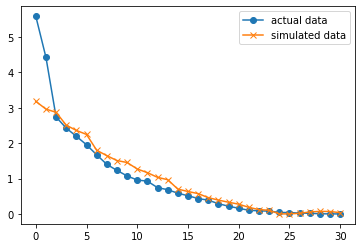

In [77]:
import matplotlib.pyplot as plt

plt.plot(w1, '-o', label='actual data');
plt.plot(w2, '-x', label='simulated data');
plt.legend();

第1,2主成分負荷量の散布図と第1,2主成分得点の散布図をそれぞれ示す。  
主成分負荷量は変数の得点であり、語句は概ね3つの方向に配置されている。  
主成分得点では、ほとんどのラベルが、主成分負荷量に対応して3つの方向に配置され、同じ番号のラベルが同じ方向に集まっている。  

In [163]:
huka = v1.T*(np.sqrt(w1).reshape(-1,1))
x1 = d1.iloc[:, 1:-1]

a1 = cor1@huka[:2].T

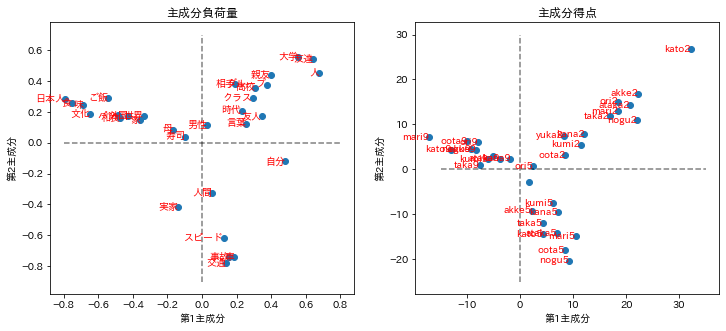

In [459]:
import japanize_matplotlib

fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(huka[0], huka[1]);
[axes[0].text(x=huka[0][i], y=huka[1][i], s=d1.columns[i+1], c='red', ha='right', va='center') for i in range(len(cor1))];
axes[0].set_title('主成分負荷量');
axes[0].hlines(0, -0.8, 0.8, linestyles='--', color='black', alpha=.5)
axes[0].vlines(0, -0.9, 0.7, linestyles='--', color='black', alpha=.5)
axes[0].set_xlabel('第1主成分');
axes[0].set_ylabel('第2主成分');

axes[1].scatter(a1[0], a1[1]);
[axes[1].text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='red', ha='right', va='center') for i in range(len(cor1))];
axes[1].hlines(0, -15, 35, linestyles='--', color='black', alpha=.5)
axes[1].vlines(0, -25, 30, linestyles='--', color='black', alpha=.5)
axes[1].set_title('主成分得点');
axes[1].set_xlabel('第1主成分');
axes[1].set_ylabel('第2主成分');

これらの2つの散布図を重ねて1つの散布図を作成する方法が多く用いられ、これをバイプロットと呼ぶ。  
主成分負荷量の矢印が長いほど、その語がこの方向にあるテキストに大きく影響を与えていることを示唆する。

(-30.0, 30.0)

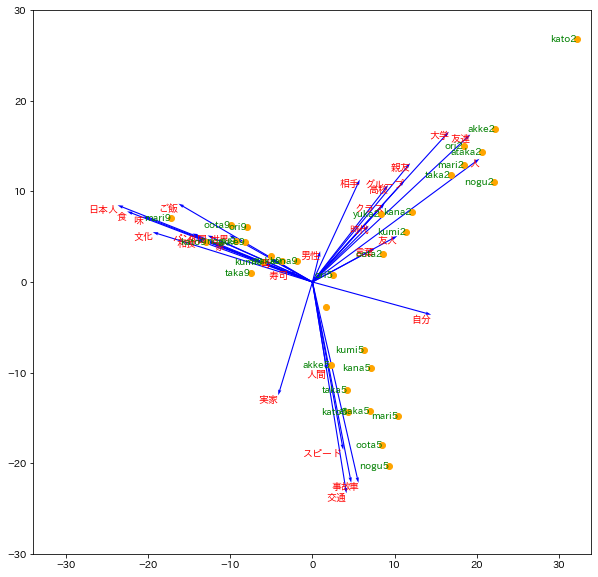

In [230]:
plt.figure(figsize=(10,10))

huka30 = huka*30

plt.quiver(np.zeros(len(huka30)), np.zeros(len(huka30)), huka30[0], huka30[1], angles='xy', scale_units='xy', scale=1, width=0.002, color='blue') # 矢印プロット
[plt.text(x=huka30[0][i], y=huka30[1][i], s=d1.columns[i+1], c='red', ha='right', va='top') for i in range(len(cor1))];

plt.scatter(a1[0], a1[1], color='orange');
[plt.text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='green', ha='right', va='center') for i in range(len(cor1))];

plt.xlim(-34,34)
plt.ylim(-30,30)

In [243]:
d1.iloc[:,1:-1]

,人,友達,車,自分,事故,人間,食,文化,寿司,日本人,...,実家,クラス,外国,男性,交通,家,親友,味,母,相手
0,8,20,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,2,3,0,0,0,0,0,...,3,0,0,0,1,0,0,0,0,0
2,2,0,0,1,0,0,3,0,0,2,...,0,0,6,0,0,1,0,0,0,0
3,11,13,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,6,2,10,1,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0
5,2,0,0,4,0,0,4,1,0,1,...,3,0,0,0,0,0,0,1,0,0
6,8,6,0,3,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,1,4,11,3,4,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8,0,1,0,1,0,0,0,0,22,0,...,0,0,0,0,0,2,0,1,0,0
9,14,20,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,4


### 6.4 対応分析
**対応分析(CA)**は、カテゴリカルデータの解析方法で、コレスポンデンス分析とも呼ばれる。  
基本的な考え方は、分割表において、行の項目と列の項目の相関が最大になるように行と列の双方を並べることである。  
#### 対応分析の例


In [244]:
import mca

mca_counts = mca.MCA(d1.iloc[:,1:])

rows = mca_counts.fs_r(N=2)  # 表側データ
cols = mca_counts.fs_c(N=2)  # 表頭データ

plt.figure(figsize=(10,10))

plt.quiver(np.zeros(len(cols)), np.zeros(len(cols)), cols[:,0], cols[:,1], angles='xy', scale_units='xy', scale=1, width=0.002, color='blue') # 矢印プロット
[plt.text(x=cols[i, 0], y=cols[i, 1], s=d1.columns[i+1], c='red', ha='right', va='top') for i in range(len(cols))];

plt.scatter(rows[:,0], rows[:,1], color='orange');
[plt.text(x=rows[i,0], y=rows[i,1], s=d1['Unnamed: 0'][i], c='green', ha='right', va='center') for i in range(len(rows))];

plt.xlim(-1.5,0.6)
plt.ylim(-1.2,0.9)

(-1.2, 0.9)

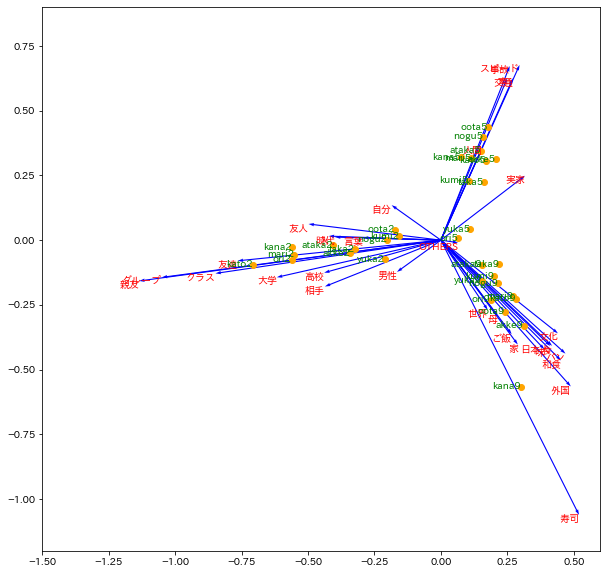

#### 対応分析のアルゴリズム
対応分析では、度数データ$F=[f_{ij}]$のカイ2乗距離を出発点とする。　　
カイ2乗距離の各セルの値の平方根を次に示す。  
$$
\chi_{ij}=\sqrt{n}\frac{f_{ij}-f_{i+}f_{+j}/n}{\sqrt{f_{i+}f_{+j}}}=\sqrt{n}\frac{p_{ij}-p_{i+}p_{+j}}{\sqrt{p_{i+}p_{+j}}}
$$

式の中の$f_{i+}$は$i$行の合計、$f_{+j}$は$j$列の合計であり、$n$はすべての層度数である。  
$p_{ij}$は総度数を基準とした相対度数であり、$p_{i+}$は$P=[p_{ij}]$における$i$行の合計、$p_{+j}$は$j$列の合計である。  
対応分析は、データ$F$、あるいは$P$を次のように変換した$Z=[z_{ij}]$を用いる。
$$
z_{ij}=\frac{f_{ij}-f_{i+}f_{+j}/n}{\sqrt{f_{i+}f_{+j}}}=\frac{p_{ij}-p_{i+}p_{+j}}{\sqrt{p_{i+}p_{+j}}}
$$

データ表の行の効果は$Q=ZZ^T$、列の効果は$\tilde{Q}=Z^TZ$の固有値分解の結果の重みに調整を行う。   
次に得られた$Q$、$\tilde{Q}$を固有値分解して得られた$Q=U\Sigma U^T$、$\tilde{Q}=\tilde{U}\Sigma\tilde{U}^T$の$U$と$\tilde{U}$について、  
それぞれのデータの行と列の総度数の効果を調整する。  
行のスコアは、各行の総度数の平方根の対角行列$D_r^{-1/2}$を$U$に乗じた$D_r^{-1/2}U$とし、  
列のスコアは、各列の総度数の平方根の対角行列$D_c^{-1/2}$を$\tilde{U}$に乗じた$D_c^{-1/2}\tilde{U}$とする。

In [336]:
f = np.array(d1.iloc[:,1:])

fpj=np.sum(f, axis=0).reshape(1,-1)
fip=np.sum(f, axis=1).reshape(-1,1)

n = np.sum(f)

z=(f-fip@fpj/n)/np.sqrt(fip@fpj)
q = z@z.T
q_tilde = z.T@z

s, u = np.linalg.eig(q)
stilde, u_tilde = np.linalg.eig(q_tilde)

row_score = np.sqrt(np.diag(1/fip.T[0]))@np.real(u)

col_score = np.sqrt(np.diag(1/fpj[0]))@u_tilde

(-0.1, 0.08)

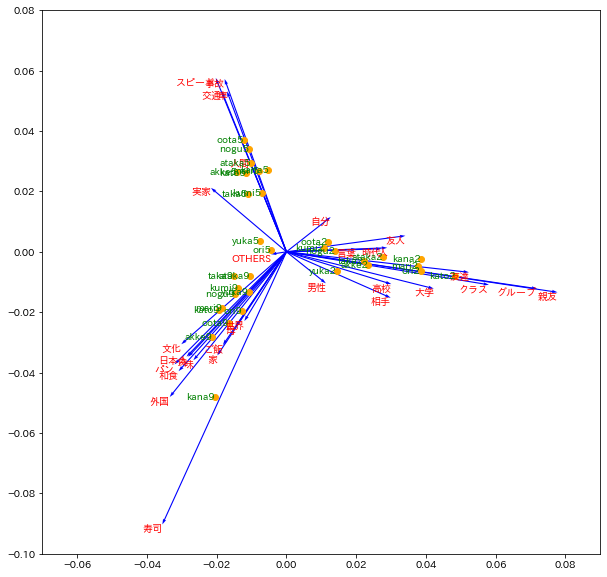

In [341]:
plt.figure(figsize=(10,10))

plt.quiver(np.zeros(len(col_score)), np.zeros(len(col_score)), col_score[:,0], col_score[:,1], angles='xy', scale_units='xy', scale=1, width=0.002, color='blue') # 矢印プロット
[plt.text(x=col_score[i, 0], y=col_score[i, 1], s=d1.columns[i+1], c='red', ha='right', va='top') for i in range(len(col_score))];

plt.scatter(row_score[:,0], row_score[:,1], color='orange');
[plt.text(x=row_score[i,0], y=row_score[i,1], s=d1['Unnamed: 0'][i], c='green', ha='right', va='center') for i in range(len(row_score))];

plt.xlim(-0.07,0.09)
plt.ylim(-0.1,0.08)

### 6.5 潜在意味解析LSA
データ行列をそのまま特異値分解する方法として、**潜在意味解析(LSA)**、あるいは**潜在意味シンキング(LSI)**と呼ばれる方法がある。  
「意味」という語が含まれているが、言語の意味情報を用いたテキスト分析のことではない。

In [455]:
f = np.array(d1.iloc[:,1:-1])

u, s, vh = np.linalg.svd(f)
vh = vh.T/np.max(np.abs(vh))

score = f@vh/np.max(np.abs(f@vh))

(-1.1, 0.5)

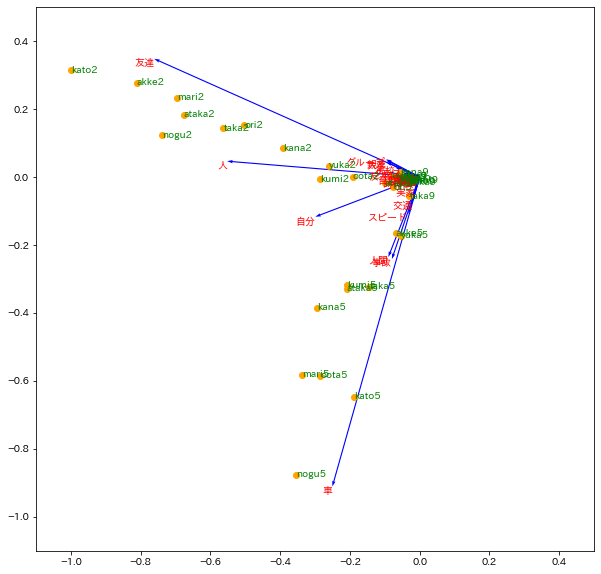

In [458]:
plt.figure(figsize=(10,10))

plt.quiver(np.zeros(len(vh)), np.zeros(len(vh)), vh[:, 0], vh[:, 1], angles='xy', scale_units='xy', scale=1, width=0.002, color='blue') # 矢印プロット
[plt.text(x=vh[i, 0], y=vh[i, 1], s=d1.columns[i+1], c='red', ha='right', va='top') for i in range(len(vh))];

plt.scatter(score[:,0], score[:,1], color='orange');
[plt.text(x=score[i,0], y=score[i,1], s=d1['Unnamed: 0'][i], c='green', ha='left', va='center') for i in range(len(score))];

plt.xlim(-1.1,0.5)
plt.ylim(-1.1,0.5)

潜在意味に関する処理ができたとは言い難い。

### 6.6 非負行列因子分解
**非負行列因子分解(NMF)**は、データ行列の要素が非負であるという制約条件がある。
#### NMFの基本的アイディア
NMFでは近似計算によってデータ行列を、次のように行のスコアと列のスコア、2つの行列に分解することを前提としている。  
$$
X_{n×m}\sim U_{n×k}V_{k×m}
$$

式の中の$k$は、分解する因子の数である。  
したがって、$U$は各行に対応する$k$個のスコアであり、$V$は各列に対応する$k$個のスコアになる。  
#### NMFの分析の例
因子の数$k$を3として推測した個体のスコアの一部分を示す。

In [538]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3,
          init='nndsvdar',
          solver='mu',
          beta_loss='kullback-leibler',
          random_state=0).fit_transform(d1.iloc[:,1:])

nmf[:5]

array([[3.02678205e-04, 4.20645586e+00, 1.97096214e-44],
       [3.53664813e-08, 2.38079189e-76, 2.21033604e+00],
       [3.23365513e+00, 6.28128964e-23, 4.34811238e-45],
       [3.25406778e-08, 3.42605823e+00, 6.98871518e-31],
       [7.27916058e-11, 1.20552703e-19, 3.49233099e+00]])

このスコアでは、各個体は、値が最も大きい列の因子に属すると判断する。  
このデータに基づいた因子と文書のヒートマップを示す。  
テキスト名の番号が同じものが、ほぼ同じ因子に属し、同じクラスタにまとまっている。

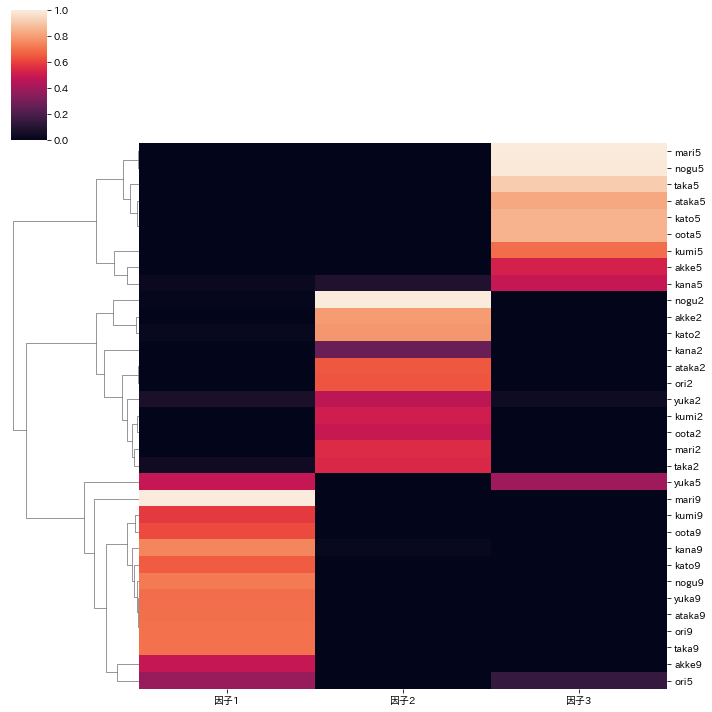

In [555]:
import seaborn as sns

nmf_scaled = nmf / np.max(nmf, axis=0)

nmf_scaled = pd.DataFrame(nmf_scaled, index=list(d1['Unnamed: 0']), columns=['因子1','因子2','因子3'])

sns.clustermap(nmf_scaled,col_cluster=False, standard_scale=True);

次に、推測された各列のスコアのヒートマップを示す。  
この値は各因子における各語句のスコアである。

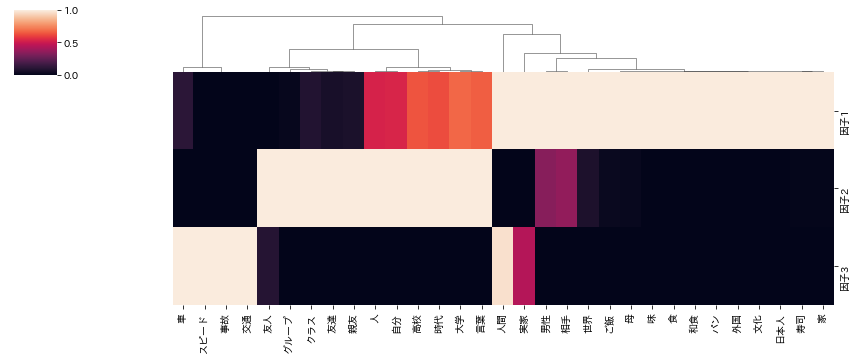

In [581]:
scr = np.array(d1.iloc[:,1:-1]).T@nmf

scr_scaled = scr / np.max(scr, axis=0)
scr_scaled = pd.DataFrame(scr_scaled, index=d1.columns[1:-1], columns=['因子1','因子2','因子3'])

sns.clustermap(scr_scaled.T,row_cluster=False, standard_scale=True, figsize=(12, 5));

スコアが大きい語句を因子ごとにまとめたヒートマップを示す。

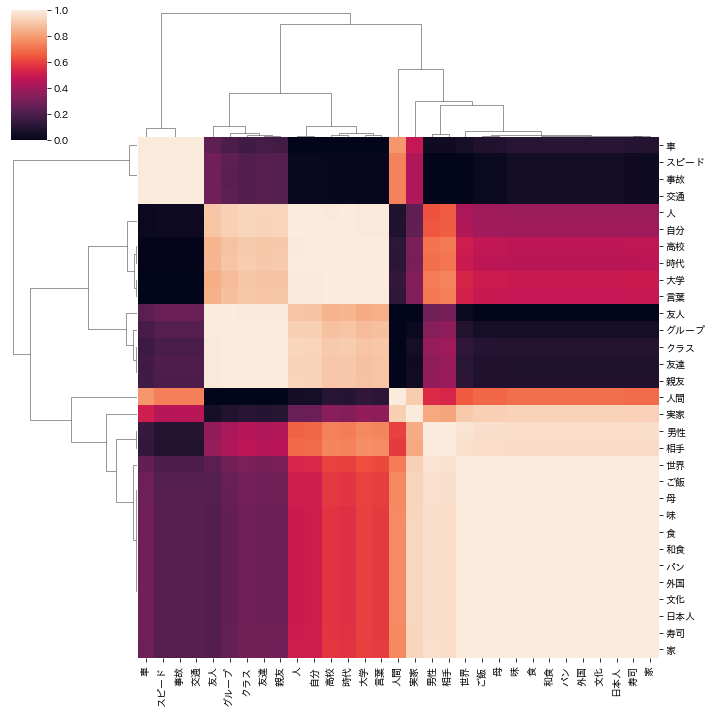

In [590]:
heat = scr_scaled.T.corr(method='pearson')

sns.clustermap(heat,standard_scale=True, figsize=(10, 10));

#### NMFの基本アルゴリズム
NMFのアルゴリズムの基本的な考え方は、次に示す距離(誤差)を最小化することである。
$$
minimize[D(X,UV)]=minimize|X-UV|
$$

そのためには因子の数$k$以外に、どのような距離を用いるかが重要である。  
基本的な距離測度として**ユークリッド距離**、一般化した**カルバック-ライブラー・ダイバージェンス(KLD)**がある。  
距離の式を次のように示す。式の中の$d_*$は何らかの距離を示す。
$$
D(X,UV)=\sum_{i=1}^n\sum_{j=1}^pd_*(x_{ij},\boldsymbol{u}_i\boldsymbol{v}_j)
$$
そしてユークリッド距離$d_{EU}$、一般化KLD($d_{KLD}$)を次に示す。  
$\boldsymbol{u}_i$は行列$U$に第$i$行のベクトルであり、$\boldsymbol{v}_j$は行列$V$に第$j$行のベクトルである。  
$$
d_{EU}(x_{ij},\boldsymbol{u}_i\boldsymbol{v}_j)=(x_{ij}-\boldsymbol{u}_i\boldsymbol{v}_j)^2\\
d_{KLD}(x_{ij},\boldsymbol{u}_i\boldsymbol{v}_j)=x_{ij}\log{\frac{x_{ij}}{\boldsymbol{u}_i\boldsymbol{v}_j}}-x_{ij}+\boldsymbol{u}_i\boldsymbol{v}_j
$$

どの距離測度を用いるかは、獲得したデータがどのような確率分布に従うとみなすかによって異なる。  
正規分布に従うとみなした場合にはユークリッド距離が、ポアソン分布に従うとみなした場合には一般化したKLDが用いられる。  
誤差$D(X,UV)$を最小化するMUR法を説明する。  
2つの距離について、未知の$U,V$に関わる項目のみを残した目的関数を次に示す。  
ユークリッド距離の場合:$F_{EU}(U,V)=\sum_{i=1}^n\sum_{j=1}^p[(\boldsymbol{u}_i\boldsymbol{v}_j)^2-2x_{ij}\boldsymbol{u}_i\boldsymbol{v}_j]$  
一般化KLDの場合:$F_{KLD}(U,V)=\sum_{i=1}^n\sum_{j=1}^p[\boldsymbol{u}_i\boldsymbol{v}_j-x_{ij}\log{(\boldsymbol{u}_i\boldsymbol{v}_j])}$  
目的関数を最小化するため、補助変数$R$を用いる補助関数$\tilde{F}_*(U,V,R)$を導入する。  
$\tilde{F}_*(U,V,R)$は次の2つの条件を満たすものとする。  
$$
F(U,V)\leq\tilde{F}_*(U,V,R)\\
F(U,V)=\min_R\tilde{F}_*(U,V,R)
$$

補助関数を用いた目的関数の最小化は次のステップで実現する。  
(1) $R$に関して目的変数を最小化する  
(2)$U$に関して最小化する  
(3)$V$に関して最小化する  

ユークリッド距離を用いて、そのプロセスを説明する。  
補助変数$r_{ijk}$が条件$r_{ijk}>0,\ \sum_{k=1^Kr_{ijk}}=1$を満たす補助関数を次に示す。  
$$
\tilde{F}_{EU}(U,V,R)=\sum_{i=1}^n\sum_{j=1}^p\biggl[\sum_{k=1}^K\frac{(u_{ik}v_{kj})^2}{r_{ijk}}-2x_{ij}\boldsymbol{u}_i\boldsymbol{v}_j] \biggr]
$$

$R$に関して最小化するため、未定乗数$\lambda_{ij}$を導入したラグランジュ乗の未定乗数は次式となる。  
$$
L(U,V,R,\Lambda)=\tilde{F}_{EU}(U,V,R)+\sum_{i=1}^n\sum_{j=1}^p\lambda_{ij}\biggl(\sum_{k=1}^Kr_{ijk}-1\biggr)
$$

変数$r_{ijk}$で偏微分した結果をゼロとすると
$$
\begin{align}
\frac{\partial L}{\partial r_{ijk}}&=\frac{\partial}{\partial r_{ijk}}\biggl\{\sum_{i=1}^n\sum_{j=1}^p\biggl[\sum_{k=1}^K\frac{(u_{ik}v_{kj})^2}{r_{ijk}}-2x_{ij}\boldsymbol{u}_i\boldsymbol{v}_j] \biggr]+\sum_{i=1}^n\sum_{j=1}^p\lambda_{ij}\biggl(\sum_{k=1}^Kr_{ijk}-1\biggr) \biggr\}\\
&=-\frac{(u_{ik}v_{kj})^2}{(r_{ijk})^2}+\lambda_{ij}=0
\end{align}
$$

$r_{ijk}$は、
$$
r_{ijk}=\frac{u_{ik}v_{kj}}{\sqrt{\lambda_{ijk}}}
$$
となる。  
$\sum_{k=1}^Kr_{ijk}=1$であるので、$k$に対して合計を求めると$\lambda_{ij}=(\boldsymbol{u}_i\boldsymbol{v}_j)^2$となる。  
また、$\hat{x}_{ij}=\boldsymbol{u}_i\boldsymbol{v}_j$であるので、この結果を上式に代入すると、
$$
r_{ijk}=\frac{u_{ik}v_{kj}}{\boldsymbol{u}_i\boldsymbol{v}_j}=\frac{u_{ik}v_{kj}}{\hat{x}_{ij}}
$$
同じ方法で$U,V$に関して最小化すると、
$$
\frac{\partial L}{\partial u_{ik}}=2u_{ik}\sum_{j=1}^p\frac{(v_{kj})^2}{r_{ijk}}-2\sum_{j=1}^px_{ij}v_{kj}=0\\
\frac{\partial L}{\partial v_{kj}}=2v_{kj}\sum_{j=1}^p\frac{(u_{ik})^2}{r_{ijk}}-2\sum_{j=1}^px_{ij}u_{ik}=0
$$
となり、次の式が得られる。  
$$
u_{ik}=\frac{\sum_{j=1}^px_{ij}v_{kj}}{\sum_{j=1}^p\frac{(v_{kj})^2}{r_{ijk}}}\\
v_{kj}=\frac{\sum_{i=1}^nx_{ij}u_{ik}}{\sum_{i=1}^n\frac{(u_{ik})^2}{r_{ijk}}}
$$
さらに最小化した$r_{ijk}$を代入し、整理すると$u_{ik},v_{kj}$の更新式は、
$$
u'_{ik}\ <-\ u_{ik}\frac{\sum_{j=1}^px_{ij}v_{kj}}{\sum_{j=1}^p\hat{x}_{ij}v_{kj}}=UXV^T(UVV^T)^{-1}\\
v'_{kj}\ <-\ v_{kj}\frac{\sum_{i=1}^nx_{ij}u_{ik}}{\sum_{i=1}^n\hat{x}_{ij}u_{ik}}=VX^TU(VUU^T)^{-1}
$$
となる。  
NMFでは、$u_{ik},v_{kj}$に初期値を与え、更新式を用いて更新を繰り返し、最適な$u_{ik},v_{kj}$を与える。